- The uncertainty principle states that the more precisely the position of some particle is determined, the less precisely its momentum can be predicted from initial conditions, and vice versa.

$$\Delta p \Delta x \le \frac{\hbar}{2}$$

- Recall that the momentum of a particle is defined as

$$p = \frac{h}{\lambda}$$

- If we define the wavelength of the particle and then localize the wave packet, the momentum (which is proportional to the wavenumber $k=2\pi / \lambda$) becomes spectrally broad in $k$ space and vice versa.
- The $k$ spectra can be determined with an FFT analysis

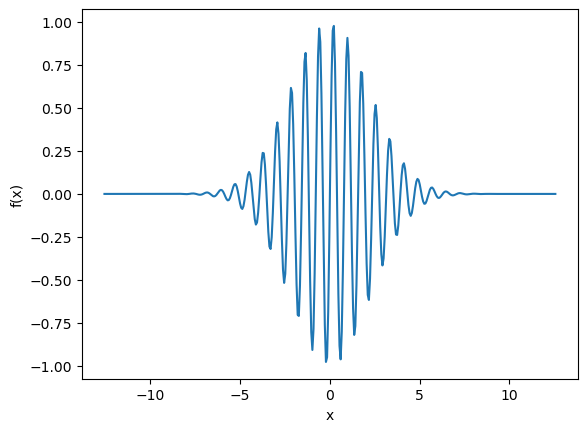

c:\Users\rokka\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


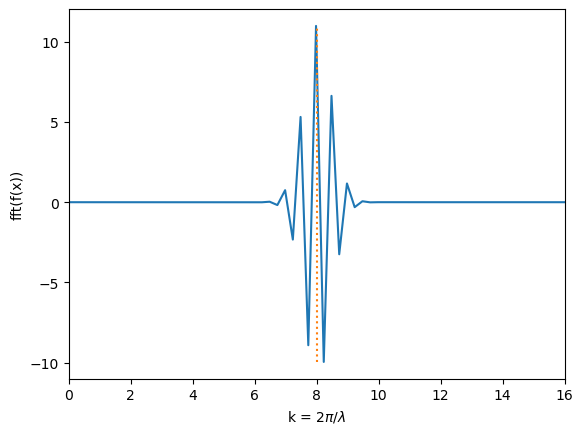

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def wp_func(x):
    f1 = np.exp(-(x)**2/sigma**2)
    f2 = np.exp(-(x)**2/(sigma)**2)*np.sin(k0*x)  #localized wavepacket
    return f2


def wave_packet(k0,sigma):
    x = np.linspace(-4*np.pi, 4*np.pi, 400)
    dx = x[1] - x[0]
    fx = wp_func(x)
    y = np.fft.rfft(fx) #This function does not compute the negative frequency terms, 
                        #and the length of the transformed axis of the output is therefore n/2 + 1.
    k = np.arange(0,len(x)/2+1)*(2*np.pi)/(len(x)*dx)   #array of wavenumbers for rfft.

    plt.figure(1)
    plt.plot(x,fx)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

    plt.figure(2)
    y2 = abs(y)**2
    plt.plot(k,y)
    plt.plot([k0,k0],[np.min(y),np.max(y)],':')
    # plt.yscale('log')
    plt.xlim(0,k0*2)
    plt.xlabel('k = $2 \pi / \lambda$')
    plt.ylabel('fft(f(x))')
    plt.show()


wavelength = np.pi/4.
k0 = 2*np.pi/wavelength
sigma = np.pi

wave_packet(k0,sigma)



